# 라이브러리

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import traceback
import datetime
from datetime import timedelta

# 데이터 분석 기본 라이브러리 관련
import os
import sys
import platform
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook

# EDA 관련
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import missingno as msno

# 데이터 전처리 관련
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.style.use('ggplot')

current_os = platform.platform().split("-")[0]
if current_os == 'Windows':
    print(f'현재 사용되는 운영체제: {current_os}')
    plt.rc('font', family='Malgun Gothic') # For Windows
    plt.rc("axes",unicode_minus=False)
elif current_os == 'Darwin': # macOS
    print(f"본 내용은 Windows 환경에서 분석됐습니다. 다른 OS로 하시게 될 경우 에러가 날 수 있습니다.")
    plt.rc('font', family='AppleGothic') # For Windows

현재 사용되는 운영체제: Windows


# 데이터 불러오기

In [2]:
actual=pd.read_csv('C:/Users/sas/Desktop/big data analysis/actual.csv',encoding='UTF-8')

In [3]:
ma = pd.read_csv('C:/Users/sas/Desktop/big data analysis/method/movingaverage.csv',encoding='UTF-8')
rf=pd.read_csv('C:/Users/sas/Desktop/big data analysis/method/randomforest.csv',encoding='UTF-8')
rbf=pd.read_csv('C:/Users/sas/Desktop/big data analysis/method/supportvectorregression_RBF_Kernel.csv',encoding='UTF-8')

In [4]:
DATE=actual[['날짜']]

# actual 데이터

In [5]:
actual.head()

,날짜,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,2019-09-02,43800.0,77600.0,150000.0,22250.0,2180.0,131000.0,6860.0,9180.0,156500.0,670.0,798.0,17200.0,131500.0,146000.0,31900.0
1,2019-09-03,43250.0,77000.0,150500.0,21700.0,2225.0,128500.0,6890.0,9650.0,160500.0,671.0,826.0,17350.0,141500.0,142000.0,31900.0
2,2019-09-04,44100.0,80000.0,151000.0,21900.0,2210.0,128500.0,7090.0,9690.0,167500.0,685.0,833.0,17400.0,139000.0,142500.0,31750.0
3,2019-09-05,45700.0,83000.0,147000.0,21850.0,2310.0,128000.0,7180.0,9330.0,164000.0,684.0,888.0,17900.0,141000.0,140000.0,32300.0
4,2019-09-06,46300.0,81900.0,149500.0,21600.0,2310.0,127500.0,7120.0,8800.0,165500.0,673.0,903.0,17750.0,136500.0,136500.0,32050.0


In [6]:
actual=actual.set_index('날짜')

In [7]:
# 일간수익률
actual_daily_ret=actual.pct_change()
# 연간수익률
actual_annual_ret=actual_daily_ret.mean()*252
# 일간 리스크
actual_daily_cov=actual_daily_ret.cov()
# 연간 리스크
actual_annual_cov=actual_daily_cov * 252

In [8]:
stocks=['삼성전자','SK하이닉스','NAVER','씨젠','우리들휴브레인','현대차','DGB금융지주','미스터블루','셀트리온','데일리블록체인','소리바다','한화솔루션','아모레퍼시픽','CJ대한통운','GS건설']
port_ret=[]
port_risk=[]
port_weights=[]
sharpe_ratio=[]

In [9]:
for _ in range(10000):
    # 비중 생성
    weights = np.random.random(len(stocks))  
    # 비중 합 1에 맞추기
    weights /= np.sum(weights)   
    # 전체 수익률 
    returns = np.dot(weights, actual_annual_ret)   
    # 전체 리스크
    risk = np.sqrt(np.dot(weights.T, np.dot(actual_annual_cov, weights)))   
    # 리스트에 추가
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    #샤프지수
    sharpe_ratio.append(returns/risk)  

In [10]:
actual_portfolio={'Returns':port_ret, 'Risk':port_risk, 'Sharpe':sharpe_ratio}
for i, s in enumerate(stocks):
    actual_portfolio[s]=[weight[i] for weight in port_weights]
actual_sharpe_df=pd.DataFrame(actual_portfolio)
actual_sharpe_df =actual_sharpe_df[['Returns','Risk','Sharpe']+[s for s in stocks]]

In [11]:
actual_sharpe_df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,0.283864,0.146659,1.935535,0.115921,0.106538,0.020846,0.019793,0.013856,0.109732,0.086722,0.088778,0.065542,0.011815,0.080440,0.090199,0.029883,0.045137,0.114797
1,0.560255,0.177071,3.164019,0.101567,0.068269,0.044264,0.079110,0.017776,0.015847,0.057422,0.083714,0.057464,0.085080,0.088921,0.091165,0.079626,0.117086,0.012691
2,0.323452,0.155669,2.077813,0.031074,0.089882,0.038006,0.007023,0.000125,0.050676,0.110763,0.105395,0.060107,0.040411,0.029437,0.063140,0.081656,0.137142,0.155163
3,0.674074,0.226117,2.981083,0.040111,0.111404,0.094038,0.023916,0.116263,0.055382,0.033407,0.082594,0.048682,0.121990,0.110382,0.012806,0.061376,0.075874,0.011776
4,0.555773,0.186900,2.973638,0.038867,0.104799,0.043536,0.079313,0.119447,0.060203,0.078420,0.130337,0.022398,0.062526,0.088915,0.010108,0.044031,0.103334,0.013767


In [12]:
actual_max_sharpe=actual_sharpe_df.loc[actual_sharpe_df['Sharpe']==actual_sharpe_df['Sharpe'].max()]
actual_min_risk=actual_sharpe_df.loc[actual_sharpe_df['Risk']==actual_sharpe_df['Risk'].min()]

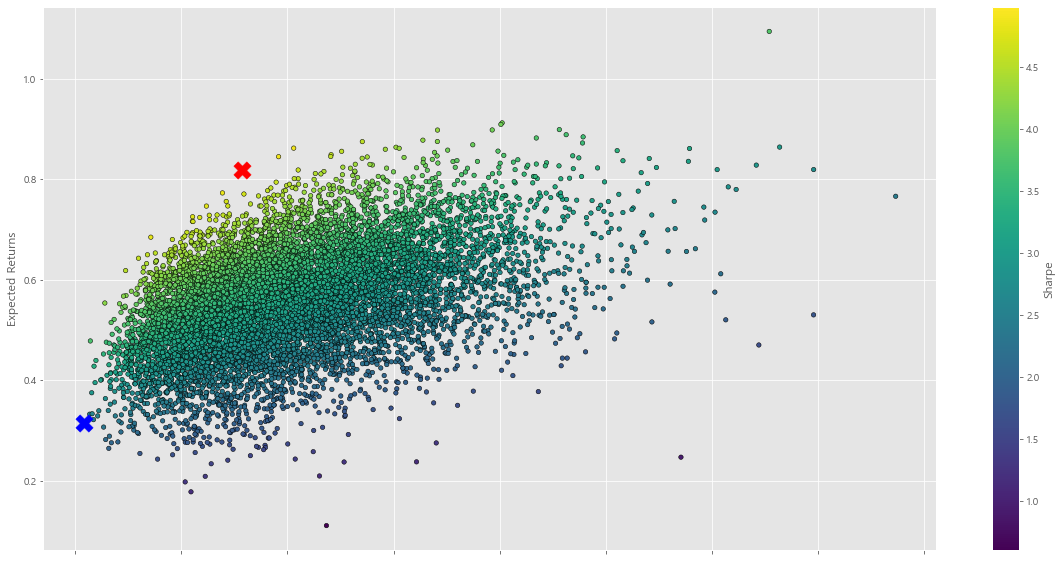

In [13]:
actual_sharpe_df.plot.scatter(x='Risk',y='Returns',c='Sharpe',cmap='viridis',edgecolors='k', figsize=(20,10),grid=True)
plt.scatter(x=actual_max_sharpe['Risk'],y=actual_max_sharpe['Returns'],c='r',marker='X',s=300)  # 샤프지수가 제일 큰 포트폴리오 빨간색 표시
plt.scatter(x=actual_min_risk['Risk'],y=actual_min_risk['Returns'],c='b',marker='X',s=300) # 리스크가 제일 작은 포트폴리오 파란색 표시
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [14]:
actual_max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
2264,0.819058,0.164335,4.984087,0.0676,0.09307,0.088435,0.114589,0.118309,0.001007,0.049257,0.010582,0.098082,0.020864,0.014262,0.08193,0.121092,0.083835,0.037088


In [15]:
actual_min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
2161,0.31532,0.127069,2.481486,0.110076,0.03866,0.063444,0.066711,0.001932,0.131574,0.080935,0.037221,0.009175,0.01557,0.089973,0.082575,0.036222,0.130763,0.105169


# RBF 데이터

In [16]:
rbf=pd.concat([DATE,rbf],axis=1)

In [17]:
rbf.head()

,날짜,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,2019-09-02,201077.602363,72618.591696,53810.004245,24650.229825,2061.759486,136785.811566,72618.591696,4758.267553,147532.632489,761.365587,943.641401,20849.434617,192108.894591,142649.080777,33326.625483
1,2019-09-03,205143.967986,72643.983224,53549.661996,24687.208711,2056.693231,136922.206947,72643.983224,4774.568178,147116.138732,757.479526,944.686731,20860.963809,191808.161156,142495.548865,33250.488176
2,2019-09-04,209235.395589,72669.620268,53297.228684,24724.409117,2051.608360,137059.157034,72669.620268,4790.904725,146700.414701,753.600119,945.762218,20872.613455,191506.713004,142341.403882,33174.167870
3,2019-09-05,213351.774007,72695.502126,53052.708168,24761.830519,2046.504944,137196.659254,72695.502126,4807.276691,146285.469104,749.727438,946.867867,20884.383157,191204.561819,142186.648052,33097.666009
4,2019-09-06,217492.991522,72721.628093,52816.104110,24799.472385,2041.383056,137334.711017,72721.628093,4823.683574,145871.310612,745.861553,948.003687,20896.272515,190901.719366,142031.283620,33020.984040


In [18]:
rbf=rbf.set_index('날짜')

In [19]:
# 일간수익률
rbf_daily_ret=rbf.pct_change()
# 연간수익률
rbf_annual_ret=rbf_daily_ret.mean()*252
# 일간 리스크
rbf_daily_cov=rbf_daily_ret.cov()
# 연간 리스크
rbf_annual_cov=rbf_daily_cov * 252

In [20]:
stocks=['삼성전자','SK하이닉스','NAVER','씨젠','우리들휴브레인','현대차','DGB금융지주','미스터블루','셀트리온','데일리블록체인','소리바다','한화솔루션','아모레퍼시픽','CJ대한통운','GS건설']
port_ret=[]
port_risk=[]
port_weights=[]
sharpe_ratio=[]

In [21]:
for _ in range(10000):
    # 비중 생성
    weights = np.random.random(len(stocks))  
    # 비중 합 1에 맞추기
    weights /= np.sum(weights)   
    # 전체 수익률 
    returns = np.dot(weights, rbf_annual_ret)   
    # 전체 리스크
    risk = np.sqrt(np.dot(weights.T, np.dot(rbf_annual_cov, weights)))   
    # 리스트에 추가
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    #샤프지수
    sharpe_ratio.append(returns/risk)  

In [22]:
rbf_portfolio={'Returns':port_ret, 'Risk':port_risk, 'Sharpe':sharpe_ratio}
for i, s in enumerate(stocks):
    rbf_portfolio[s]=[weight[i] for weight in port_weights]
rbf_sharpe_df=pd.DataFrame(rbf_portfolio)
rbf_sharpe_df =rbf_sharpe_df[['Returns','Risk','Sharpe']+[s for s in stocks]]

In [23]:
rbf_sharpe_df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,-0.098109,0.005077,-19.324634,0.026976,0.025058,0.068687,0.053560,0.116226,0.048021,0.081791,0.055229,0.021581,0.093036,0.130943,0.012559,0.077391,0.147228,0.041714
1,0.438793,0.021088,20.807796,0.142777,0.023040,0.063009,0.137832,0.039168,0.078884,0.070965,0.030388,0.004468,0.115674,0.013046,0.085928,0.068281,0.026814,0.099726
2,0.672190,0.026029,25.824958,0.096536,0.001265,0.133485,0.100690,0.048370,0.031319,0.127365,0.082459,0.020430,0.027508,0.149205,0.031165,0.084313,0.017812,0.048078
3,-0.198763,0.011667,-17.036580,0.008537,0.056469,0.106334,0.104480,0.024608,0.063372,0.040280,0.066451,0.051623,0.138753,0.001382,0.125617,0.044354,0.057145,0.110597
4,0.343698,0.015269,22.509294,0.063553,0.095476,0.139663,0.097359,0.088323,0.072538,0.037506,0.035023,0.012862,0.027834,0.086579,0.010085,0.123499,0.081013,0.028688


In [24]:
rbf_max_sharpe=rbf_sharpe_df.loc[rbf_sharpe_df['Sharpe']==rbf_sharpe_df['Sharpe'].max()]
rbf_min_risk=rbf_sharpe_df.loc[rbf_sharpe_df['Risk']==rbf_sharpe_df['Risk'].min()]

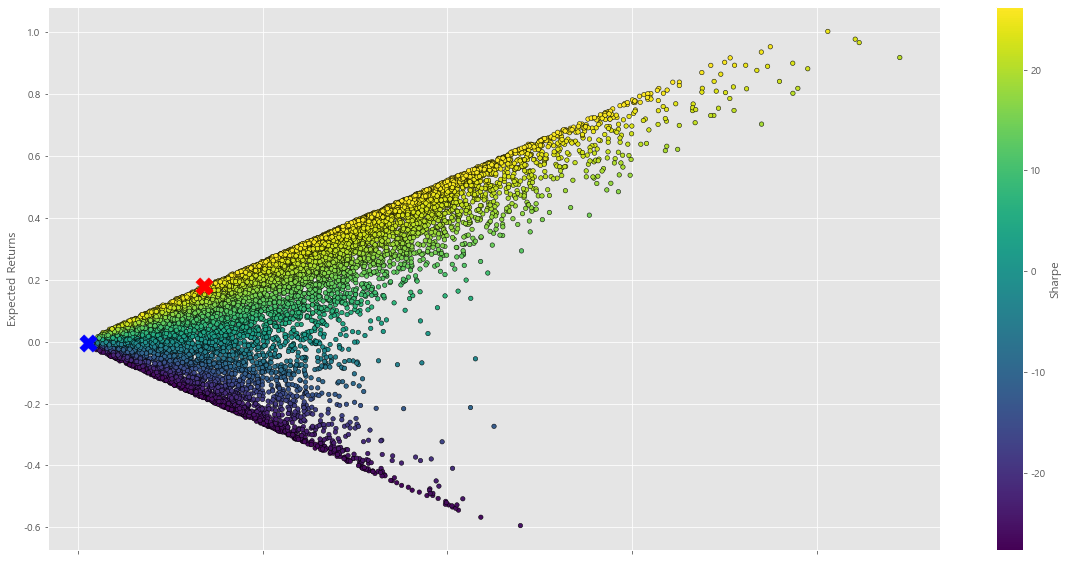

In [25]:
rbf_sharpe_df.plot.scatter(x='Risk',y='Returns',c='Sharpe',cmap='viridis',edgecolors='k', figsize=(20,10),grid=True)
plt.scatter(x=rbf_max_sharpe['Risk'],y=rbf_max_sharpe['Returns'],c='r',marker='X',s=300)  # 샤프지수가 제일 큰 포트폴리오 빨간색 표시
plt.scatter(x=rbf_min_risk['Risk'],y=rbf_min_risk['Returns'],c='b',marker='X',s=300) # 리스크가 제일 작은 포트폴리오 파란색 표시
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [26]:
rbf_max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
6374,0.179217,0.006831,26.234043,0.010435,0.024957,0.029765,0.127448,0.07855,0.128877,0.084469,0.143505,0.007021,0.012684,0.045074,0.098605,0.1569,0.012444,0.039267


In [27]:
rbf_min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
5861,-0.004513,0.000533,-8.463147,0.042206,0.03674,0.037785,0.118204,0.090214,0.077286,0.124845,0.012946,0.144582,0.078104,0.118181,0.02906,0.066796,0.01162,0.011429


# MA 데이터

In [28]:
ma=pd.concat([DATE,ma],axis=1)

In [29]:
ma.head()

,날짜,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,2019-09-02,5371.036585,71851.219512,124158.536585,24896.951220,2246.951220,133378.048780,7789.268293,5371.036585,44492.073171,1021.439024,1058.158537,20303.048780,161164.634146,71851.219512,36849.390244
1,2019-09-03,5401.537032,71753.063653,124160.469958,24904.231112,2242.523795,133346.073766,7778.283760,5401.537032,44487.708209,1015.054134,1056.977543,20303.695717,160544.690660,71753.063653,36809.748662
2,2019-09-04,5432.409434,71648.832722,124168.524470,24917.087589,2238.408232,133319.806373,7767.165269,5432.409434,44490.607090,1009.079185,1055.843123,20297.643226,159947.674693,71648.832722,36767.184621
3,2019-09-05,5464.999793,71595.769706,124231.555256,24944.125243,2235.218088,133348.096694,7755.911187,5464.999793,44515.492542,1004.677712,1055.121698,20289.687655,159434.841457,71595.769706,36747.272238
4,2019-09-06,5498.353449,71561.571776,124252.671784,24971.492624,2231.684163,133388.927142,7746.471079,5498.353449,44535.193671,1000.405488,1054.513426,20279.805797,158897.461475,71561.571776,36731.385314


In [30]:
ma=ma.set_index('날짜')

In [31]:
# 일간수익률
ma_daily_ret=ma.pct_change()
# 연간수익률
ma_annual_ret=ma_daily_ret.mean()*252
# 일간 리스크
ma_daily_cov=ma_daily_ret.cov()
# 연간 리스크
ma_annual_cov=ma_daily_cov * 252

In [32]:
stocks=['삼성전자','SK하이닉스','NAVER','씨젠','우리들휴브레인','현대차','DGB금융지주','미스터블루','셀트리온','데일리블록체인','소리바다','한화솔루션','아모레퍼시픽','CJ대한통운','GS건설']
port_ret=[]
port_risk=[]
port_weights=[]
sharpe_ratio=[]

In [33]:
for _ in range(10000):
    # 비중 생성
    weights = np.random.random(len(stocks))  
    # 비중 합 1에 맞추기
    weights /= np.sum(weights)   
    # 전체 수익률 
    returns = np.dot(weights, ma_annual_ret)   
    # 전체 리스크
    risk = np.sqrt(np.dot(weights.T, np.dot(ma_annual_cov, weights)))   
    # 리스트에 추가
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    #샤프지수
    sharpe_ratio.append(returns/risk)  

In [34]:
ma_portfolio={'Returns':port_ret, 'Risk':port_risk, 'Sharpe':sharpe_ratio}
for i, s in enumerate(stocks):
    ma_portfolio[s]=[weight[i] for weight in port_weights]
ma_sharpe_df=pd.DataFrame(ma_portfolio)
ma_sharpe_df =ma_sharpe_df[['Returns','Risk','Sharpe']+[s for s in stocks]]

In [35]:
ma_sharpe_df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,0.037377,0.007722,4.840437,0.073168,0.099928,0.040644,0.082034,0.008760,0.025319,0.071956,0.093797,0.093222,0.055154,0.028314,0.096965,0.035700,0.096669,0.098369
1,0.031999,0.006747,4.742528,0.092121,0.014125,0.117856,0.081240,0.039398,0.014770,0.096345,0.068141,0.122849,0.005218,0.053836,0.063014,0.088425,0.005027,0.137635
2,-0.019819,0.006225,-3.183691,0.018928,0.179852,0.157852,0.057377,0.016994,0.065091,0.065587,0.039498,0.077067,0.107582,0.017688,0.080121,0.055540,0.053589,0.007233
3,-0.006346,0.005200,-1.220412,0.039236,0.051553,0.150025,0.033947,0.068042,0.134930,0.059595,0.033281,0.008079,0.009898,0.058151,0.082777,0.077110,0.089015,0.104361
4,0.069031,0.010017,6.891137,0.106650,0.040843,0.116992,0.038141,0.030846,0.024935,0.113718,0.102202,0.039957,0.053729,0.028002,0.098524,0.066496,0.112599,0.026364


In [36]:
ma_max_sharpe=ma_sharpe_df.loc[ma_sharpe_df['Sharpe']==ma_sharpe_df['Sharpe'].max()]
ma_min_risk=ma_sharpe_df.loc[ma_sharpe_df['Risk']==ma_sharpe_df['Risk'].min()]

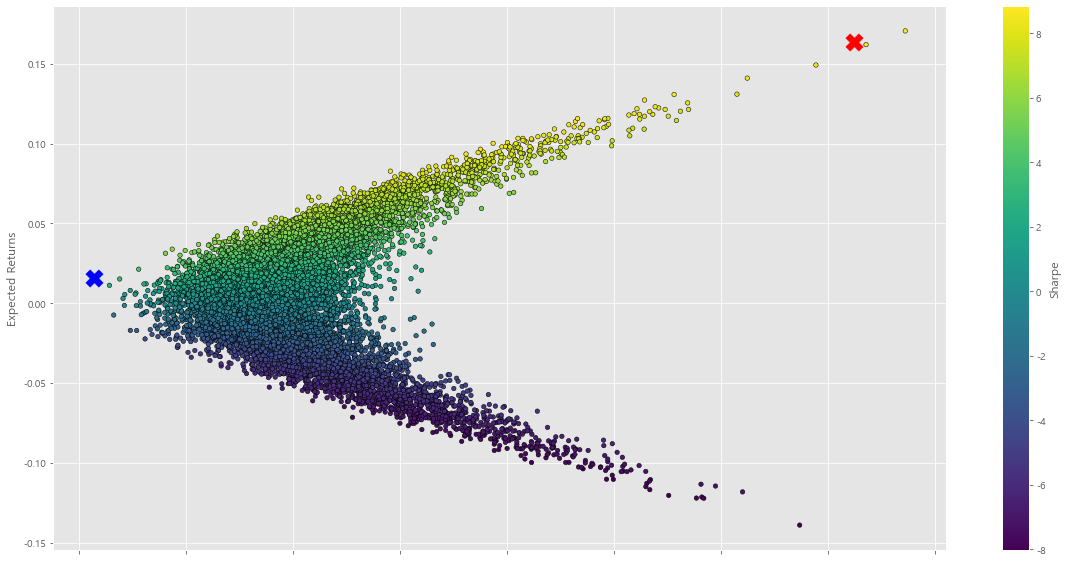

In [37]:
ma_sharpe_df.plot.scatter(x='Risk',y='Returns',c='Sharpe',cmap='viridis',edgecolors='k', figsize=(20,10),grid=True)
plt.scatter(x=ma_max_sharpe['Risk'],y=ma_max_sharpe['Returns'],c='r',marker='X',s=300)  # 샤프지수가 제일 큰 포트폴리오 빨간색 표시
plt.scatter(x=ma_min_risk['Risk'],y=ma_min_risk['Returns'],c='b',marker='X',s=300) # 리스크가 제일 작은 포트폴리오 파란색 표시
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [38]:
ma_max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
7735,0.163337,0.018479,8.839155,0.155054,0.019741,0.075969,0.031486,0.01942,0.13722,0.031433,0.156374,0.070541,0.023986,0.051403,0.024838,0.009042,0.158774,0.034717


In [39]:
ma_min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
8717,0.015657,0.004274,3.663453,0.009644,0.127337,0.140209,0.089606,0.003937,0.110566,0.023073,0.052933,0.104785,0.009823,0.022675,0.037052,0.026964,0.108827,0.132569


# RF 데이터

In [40]:
rf=pd.concat([DATE,rf],axis=1)

In [41]:
rf.head()

,날짜,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,2019-09-02,43938.132937,71448.0,146125.0,22554.435825,2200.0,124969.935112,74592.862975,9081.306674,157000.0,649.203043,1593.686439,16940.0,191063.791057,156367.464483,31565.384615
1,2019-09-03,43938.132937,71448.0,146125.0,22554.435825,2200.0,124969.935112,74592.862975,9081.306674,157000.0,649.203043,1593.686439,16940.0,191063.791057,156367.464483,31565.384615
2,2019-09-04,43938.132937,71448.0,146125.0,22554.435825,2200.0,124969.935112,74592.862975,9081.306674,157000.0,649.203043,1593.686439,16940.0,191063.791057,156367.464483,31565.384615
3,2019-09-05,43938.132937,71448.0,146125.0,22554.435825,2200.0,124969.935112,74592.862975,9081.306674,157000.0,649.203043,1593.686439,16940.0,191063.791057,156367.464483,31565.384615
4,2019-09-06,43938.132937,71448.0,146125.0,22554.435825,2200.0,124969.935112,74592.862975,9081.306674,157000.0,649.203043,1593.686439,16940.0,191063.791057,156367.464483,31565.384615


In [42]:
rf=rf.set_index('날짜')

In [43]:
# 일간수익률
rf_daily_ret=rf.pct_change()
# 연간수익률
rf_annual_ret=rf_daily_ret.mean()*252
# 일간 리스크
rf_daily_cov=rf_daily_ret.cov()
# 연간 리스크
rf_annual_cov=rf_daily_cov * 252

In [44]:
stocks=['삼성전자','SK하이닉스','NAVER','씨젠','우리들휴브레인','현대차','DGB금융지주','미스터블루','셀트리온','데일리블록체인','소리바다','한화솔루션','아모레퍼시픽','CJ대한통운','GS건설']
port_ret=[]
port_risk=[]
port_weights=[]
sharpe_ratio=[]

In [45]:
for _ in range(10000):
    # 비중 생성
    weights = np.random.random(len(stocks))   
    # 비중 합 1에 맞추기
    weights /= np.sum(weights)   
    # 전체 수익률 
    returns = np.dot(weights, rf_annual_ret)   
    # 전체 리스크
    risk = np.sqrt(np.dot(weights.T, np.dot(rf_annual_cov, weights)))   
    # 리스트에 추가
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    #샤프지수
    sharpe_ratio.append(returns/risk)  

In [46]:
rf_portfolio={'Returns':port_ret, 'Risk':port_risk, 'Sharpe':sharpe_ratio}
for i, s in enumerate(stocks):
    rf_portfolio[s]=[weight[i] for weight in port_weights]
rf_sharpe_df=pd.DataFrame(rf_portfolio)
rf_sharpe_df =rf_sharpe_df[['Returns','Risk','Sharpe']+[s for s in stocks]]

In [47]:
rf_sharpe_df.head()

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,0.0,0.0,NaN,0.007721,0.039162,0.003882,0.086610,0.030269,0.084869,0.040493,0.131457,0.062330,0.050444,0.137361,0.026315,0.070057,0.097559,0.131472
1,0.0,0.0,NaN,0.045981,0.067126,0.057909,0.003828,0.089057,0.013640,0.041932,0.082838,0.045603,0.095852,0.123985,0.071131,0.114565,0.041424,0.105128
2,0.0,0.0,NaN,0.080930,0.081007,0.073211,0.068979,0.069983,0.025096,0.086268,0.039808,0.050207,0.081268,0.002913,0.069659,0.060105,0.100427,0.110140
3,0.0,0.0,NaN,0.107429,0.054348,0.126763,0.092839,0.019202,0.060189,0.090623,0.069221,0.040202,0.052058,0.048721,0.069500,0.109295,0.017346,0.042263
4,0.0,0.0,NaN,0.048123,0.107781,0.007962,0.092914,0.097169,0.102890,0.093176,0.021324,0.078659,0.094292,0.099259,0.090705,0.005610,0.018172,0.041965


In [48]:
rf_max_sharpe=rf_sharpe_df.loc[rf_sharpe_df['Sharpe']==rf_sharpe_df['Sharpe'].max()]
rf_min_risk=rf_sharpe_df.loc[rf_sharpe_df['Risk']==rf_sharpe_df['Risk'].min()]

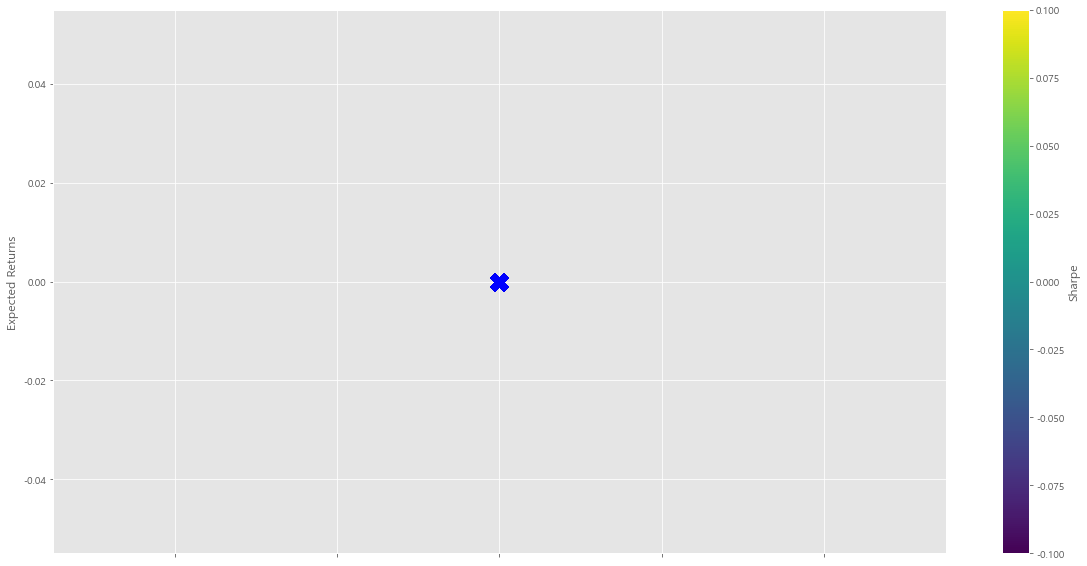

In [49]:
rf_sharpe_df.plot.scatter(x='Risk',y='Returns',c='Sharpe',cmap='viridis',edgecolors='k', figsize=(20,10),grid=True)
plt.scatter(x=rf_max_sharpe['Risk'],y=rf_max_sharpe['Returns'],c='r',marker='X',s=300)  # 샤프지수가 제일 큰 포트폴리오 빨간색 표시
plt.scatter(x=rf_min_risk['Risk'],y=rf_min_risk['Returns'],c='b',marker='X',s=300) # 리스크가 제일 작은 포트폴리오 파란색 표시
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [50]:
rf_max_sharpe

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설


In [51]:
rf_min_risk

,Returns,Risk,Sharpe,삼성전자,SK하이닉스,NAVER,씨젠,우리들휴브레인,현대차,DGB금융지주,미스터블루,셀트리온,데일리블록체인,소리바다,한화솔루션,아모레퍼시픽,CJ대한통운,GS건설
0,0.0,0.0,NaN,0.007721,0.039162,0.003882,0.086610,0.030269,0.084869,0.040493,0.131457,0.062330,0.050444,0.137361,0.026315,0.070057,0.097559,0.131472
1,0.0,0.0,NaN,0.045981,0.067126,0.057909,0.003828,0.089057,0.013640,0.041932,0.082838,0.045603,0.095852,0.123985,0.071131,0.114565,0.041424,0.105128
2,0.0,0.0,NaN,0.080930,0.081007,0.073211,0.068979,0.069983,0.025096,0.086268,0.039808,0.050207,0.081268,0.002913,0.069659,0.060105,0.100427,0.110140
3,0.0,0.0,NaN,0.107429,0.054348,0.126763,0.092839,0.019202,0.060189,0.090623,0.069221,0.040202,0.052058,0.048721,0.069500,0.109295,0.017346,0.042263
4,0.0,0.0,NaN,0.048123,0.107781,0.007962,0.092914,0.097169,0.102890,0.093176,0.021324,0.078659,0.094292,0.099259,0.090705,0.005610,0.018172,0.041965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,NaN,0.076117,0.099292,0.106874,0.032513,0.048020,0.057637,0.037991,0.085388,0.077921,0.078221,0.022795,0.093378,0.096750,0.054264,0.032842
9996,0.0,0.0,NaN,0.119938,0.020412,0.063839,0.117810,0.053359,0.118000,0.023911,0.067198,0.043302,0.073937,0.010583,0.114889,0.022637,0.041784,0.108402
9997,0.0,0.0,NaN,0.002246,0.065051,0.098369,0.068716,0.074923,0.027112,0.090352,0.012760,0.063542,0.122617,0.077575,0.073207,0.052091,0.103591,0.067849
9998,0.0,0.0,NaN,0.075475,0.108353,0.104697,0.114240,0.049081,0.072081,0.052559,0.068268,0.059419,0.113477,0.054447,0.068620,0.016944,0.017665,0.024674


---

In [57]:
my_dict = {"return" :[float(actual_max_sharpe['Returns']),float(ma_max_sharpe['Returns']),float(rbf_max_sharpe['Returns'])],
           "volatility" : [ float(actual_max_sharpe['Risk']),float(ma_max_sharpe['Risk']),float(rbf_max_sharpe['Risk']) ]}
eff_max = pd.DataFrame(my_dict)
eff_max.index = ["Actual","Moving Average", "RBF"] 

In [58]:
eff_max

,return,volatility
Actual,0.819058,0.164335
Moving Average,0.163337,0.018479
RBF,0.179217,0.006831


In [61]:
my_dict = {"return" :[float(actual_min_risk['Returns']),float(ma_min_risk['Returns']),float(rbf_min_risk['Returns'])],
           "volatility" : [ float(actual_min_risk['Risk']),float(ma_min_risk['Risk']),float(rbf_min_risk['Risk']) ]}
eff_min = pd.DataFrame(my_dict)
eff_min.index = ["Actual","Moving Average", "RBF"] 

In [62]:
eff_min

,return,volatility
Actual,0.315320,0.127069
Moving Average,0.015657,0.004274
RBF,-0.004513,0.000533
